In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import requests
import os
from google.colab import userdata

In [2]:
tng_api_key = userdata.get('TNG_API_KEY')
baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":tng_api_key}

In [40]:
def get(path, params=None, out_filename=None):
    headers = {"api-key":tng_api_key}
    r = requests.get(path, params=params, headers=headers)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers or out_filename is not None:
        if out_filename is not None:
            filename = out_filename
        else:
            filename = r.headers['content-disposition'].split("filename=")[1]

        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [41]:
r = get(baseUrl)
for simulation in r['simulations']: #only get TNG50
    if simulation['name'] == 'TNG50-1':
        url = simulation['url']
        break
tng50 = get(url)

In [48]:
url = 'http://www.tng-project.org/api/TNG50-1/snapshots/z=1.8/'
snapshot = get(url)

sub_url = f"http://www.tng-project.org/api/TNG50-1/snapshots/{snapshot['number']}/subhalos/0/"
subhalo = get(sub_url)

In [50]:
vis_query1 = "partField=vmag&ctName=inferno"
vis_query2 = "partField=temp&ctName=viridis"

In [52]:
#getting vmag at different snapshots
vis_url1_1 = f"http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?{vis_query1}"
vis_r1_1 = get(vis_url1_1, out_filename= 'vmag1.png')

vis_url1_2 = f"http://www.tng-project.org/api/TNG50-1/snapshots/36/subhalos/0/vis.png?{vis_query1}"
vis_r1_2 = get(vis_url1_2, out_filename= 'vmag2.png')

vis_url1_3 = f"http://www.tng-project.org/api/TNG50-1/snapshots/37/subhalos/0/vis.png?{vis_query1}"
vis_r1_3 = get(vis_url1_3, out_filename= 'vmag3.png')

vis_url1_4 = f"http://www.tng-project.org/api/TNG50-1/snapshots/38/subhalos/0/vis.png?{vis_query1}"
vis_r1_4 = get(vis_url1_4, out_filename= 'vmag4.png')

vis_url1_5 = f"http://www.tng-project.org/api/TNG50-1/snapshots/39/subhalos/0/vis.png?{vis_query1}"
vis_r1_5 = get(vis_url1_5, out_filename= 'vmag5.png')

In [53]:
#getting temp at different snapshots
vis_url2_1 = f"http://www.tng-project.org/api/TNG50-1/snapshots/35/subhalos/0/vis.png?{vis_query2}"
vis_r2_1 = get(vis_url2_1, out_filename= 'temp1.png')

vis_url2_2 = f"http://www.tng-project.org/api/TNG50-1/snapshots/36/subhalos/0/vis.png?{vis_query2}"
vis_r2_2 = get(vis_url2_2, out_filename= 'temp2.png')

vis_url2_3 = f"http://www.tng-project.org/api/TNG50-1/snapshots/37/subhalos/0/vis.png?{vis_query2}"
vis_r2_3 = get(vis_url2_3, out_filename= 'temp3.png')

vis_url2_4 = f"http://www.tng-project.org/api/TNG50-1/snapshots/38/subhalos/0/vis.png?{vis_query2}"
vis_r2_4 = get(vis_url2_4, out_filename= 'temp4.png')

vis_url2_5 = f"http://www.tng-project.org/api/TNG50-1/snapshots/39/subhalos/0/vis.png?{vis_query2}"
vis_r2_5 = get(vis_url2_5, out_filename= 'temp5.png')

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

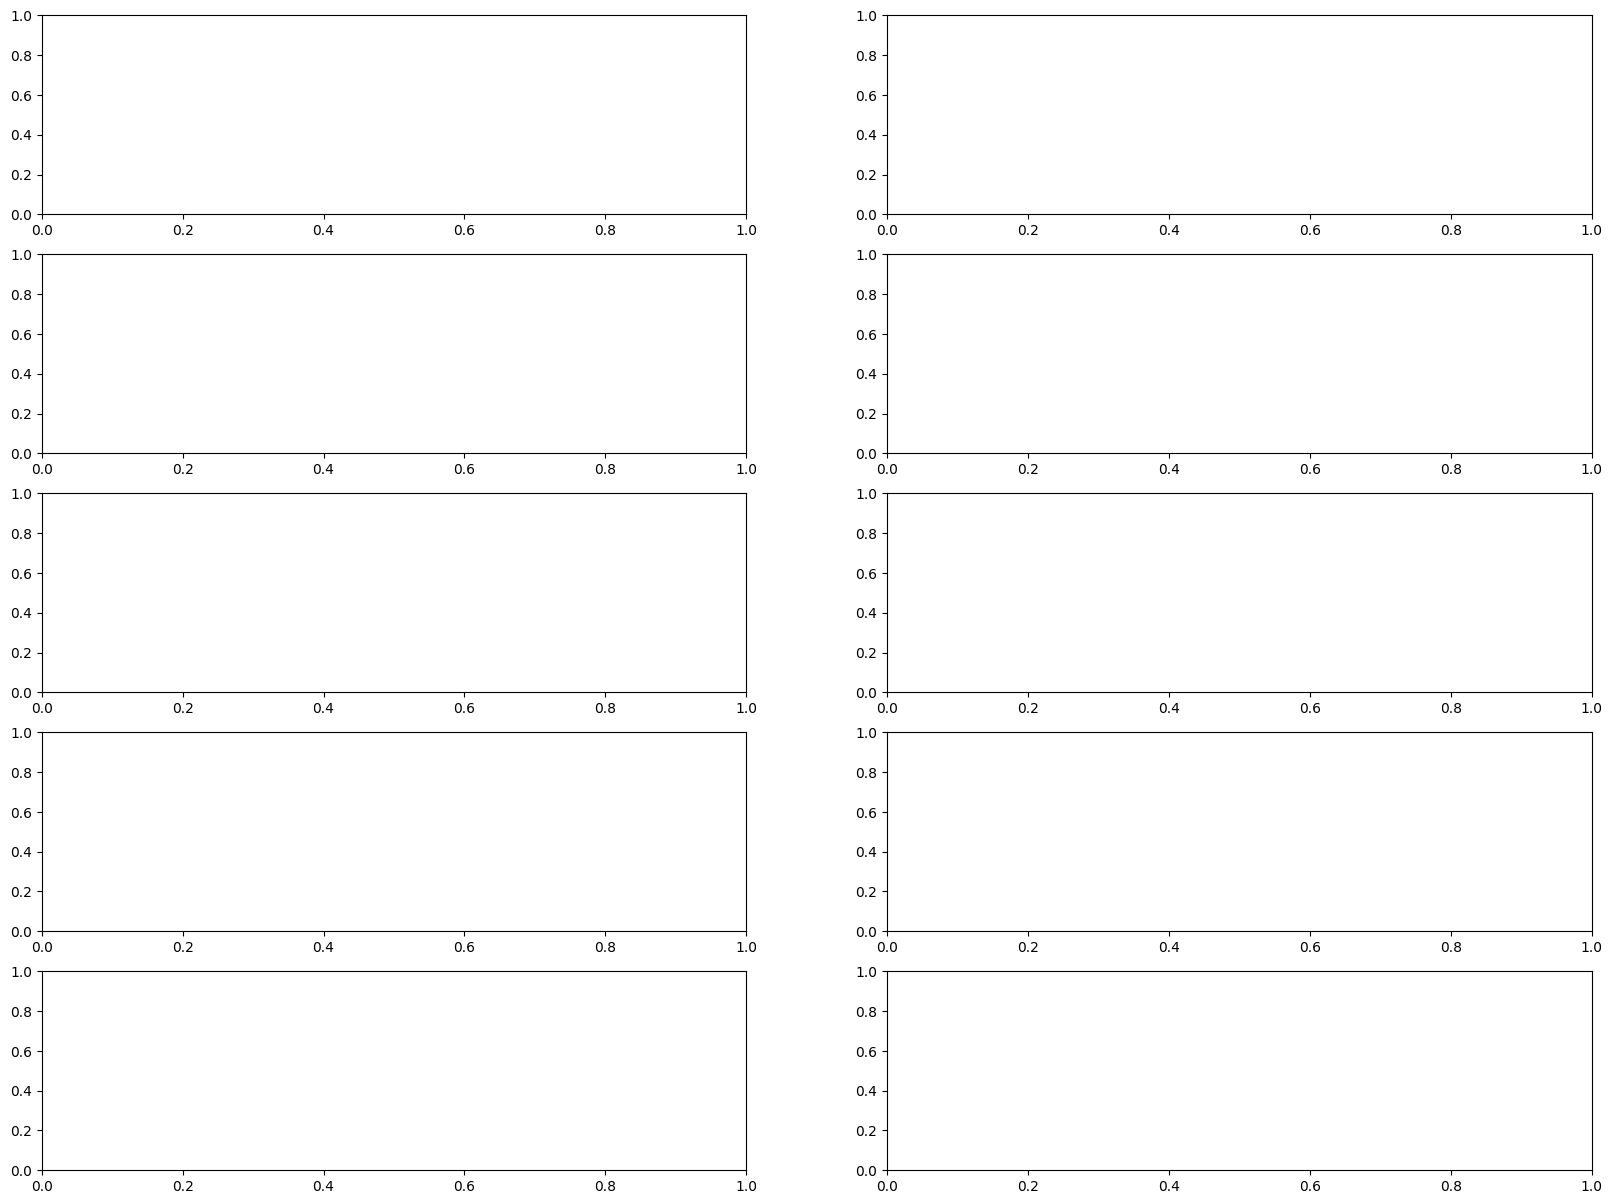

In [57]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 15))
filenames = ['vmag1.png', 'temp1.png',
             'vmag2.png', 'temp2.png',
             'vmag3.png', 'temp3.png',
             'vmag4.png', 'temp4.png',
             'vmag5.png', 'temp5.png']
for ax, filename in zip(axes, filenames):
    ax.imshow(plt.imread(filenames))
    ax.axis('off')
plt.subplots_adjust(wspace=0.001)